<a href="https://colab.research.google.com/github/hitcaff/Topic_Modeling_on_news_articles/blob/main/Topic_Modeling_on_News_Articles(Unsupervised)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Topic Modeling on News Articles(BBC)



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

This project focuses on applying unsupervised machine learning techniques, specifically Topic Modeling, to a dataset of BBC news articles. The primary objective is to identify and categorize these articles into distinct topics without relying on pre-defined labels.

The initial steps involved loading the dataset, which consists of text content and their original categories (used here for validation and analysis, not for training the unsupervised models). Basic data exploration was performed to understand the dataset's structure, including the number of rows and columns, data types, and the presence of duplicate or missing values. Duplicate articles were identified and removed to ensure data integrity and prevent bias in the topic modeling process.

Text data preprocessing was a crucial phase to prepare the articles for modeling. This involved several steps:
- **Expanding Contractions:** Standardizing contracted words (e.g., "don't" to "do not") for consistent tokenization.
- **Lowercasing:** Converting all text to lowercase to treat words case-insensitively.
- **Removing Punctuations, URLs, and Digits:** Eliminating characters and patterns that are not relevant for topic identification.
- **Removing Stopwords:** Removing common English words that do not contribute to the meaning of topics (e.g., "the", "a", "is").
- **Removing White spaces:** Cleaning up extra spaces for consistent formatting.
- **Tokenization:** Splitting the text into individual words or tokens.
- **Lemmatization:** Reducing words to their base form (e.g., "running" to "run") to group similar terms and reduce vocabulary size. Part-of-speech tagging was incorporated to improve lemmatization accuracy.

Followed by preprocessing, the text data was vectorized using the CountVectorizer. This technique converts the text into a numerical representation (a matrix of token counts), which is required for machine learning models. The CountVectorizer was configured to consider a maximum of 1000 features (words) while ignoring terms that appear in too few or too many documents.

Two unsupervised topic modeling algorithms were implemented:
- **Latent Semantic Analysis (LSA) using TruncatedSVD:** LSA is a dimensionality reduction technique applied to the term-document matrix. It aims to identify underlying semantic relationships between terms and documents and group them into a specified number of components (topics). An initial LSA model was trained with 40 components, and the explained variance was checked. The top words for each LSA topic were also displayed to get an initial understanding of the topics.
- **Latent Dirichlet Allocation (LDA):** LDA is a probabilistic generative model that assumes each document is a mixture of topics and each topic is a mixture of words. An initial LDA model was trained with 5 topics. Perplexity, a measure of how well the model predicts a new sample, was calculated for this initial model. Hyperparameter tuning was performed for the LDA model using GridSearchCV to find the best combination of `n_components` and `learning_decay` based on the log-likelihood score. The best parameters and the corresponding best score and perplexity on the training data were reported.

Visualizations were generated to explore the data and the results of the topic models:
- **Distribution of News Categories:** A count plot showed the number of articles in each original category.
- **Distribution of Article Text Lengths and Word Counts:** Histograms and box plots provided insights into the length characteristics of the articles overall and by category.
- **Word Clouds:** Word clouds were generated for each original category and for the overall dataset to visualize the most frequent terms.
- **Most Common Words and Bi-grams:** Bar charts displayed the most frequent single words and two-word phrases across the entire dataset and within each category.
- **Relationship between Text Length and Word Count:** A scatter plot showed the correlation between these two metrics.
- **Average Topic Intensity by Category (LSA and LDA):** Heatmaps visualized how strongly each original category is associated with the identified topics from both LSA and LDA models.
- **t-SNE visualization of LDA Topic Distribution:** A scatter plot using t-SNE was generated to visualize the document-topic distribution from the LDA model, colored by the original category, to see how well the topics separate the categories.
- **Word Clouds for LDA Topics:** Word clouds were created for each identified LDA topic to visually represent the most important words within each topic.

The project aims to use these topic modeling techniques and visualizations to uncover the underlying themes present in the BBC news articles, providing insights into the distribution of topics and the key terms associated with them.

# **GitHub Link -**

https://github.com/hitcaff/Topic_Modeling_on_news_articles

# **Problem Statement**


**Write Problem Statement Here.** : This project aims to analyze and categorize BBC news articles into different topics using unsupervised machine learning techniques.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [5]:
# Import Libraries

!pip install textblob
!pip install wordcloud
import os                                                    # importing os module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                              # importing data visualization modules
import seaborn as sns
import matplotlib.mlab as mlab                               # importing mlab for implementing MATLAB functions
import ast                                                   # import ast(abstract syntax tree)
import nltk                                                  # importing Natural Language Toolkit and other NLP modules

from IPython.display import display                          # importing tqdm and display modules for progress meters/bars
from sklearn.feature_extraction.text import CountVectorizer  # importing CountVectorizer for feature extraction
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from collections import Counter
from wordcloud import WordCloud                              # importing wordcloud to represent topics wordcloud

from sklearn.manifold import TSNE                            # importing TSNE for data exploration and visualizing high-dimensional data
from sklearn.decomposition import TruncatedSVD               # importing decomposition modules
from sklearn.decomposition import LatentDirichletAllocation
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob, Word
from sklearn.feature_extraction.text import CountVectorizer  # importing countVectorizer for text vectorization

import warnings                                               # Importing warnings library
warnings.filterwarnings('ignore')

### Dataset Loading

In [6]:
# Load Dataset
!wget -nc https://mydatt.s3.eu-north-1.amazonaws.com/bbc-20250702T073522Z-1-001.zip

--2025-08-09 06:05:01--  https://mydatt.s3.eu-north-1.amazonaws.com/bbc-20250702T073522Z-1-001.zip
Resolving mydatt.s3.eu-north-1.amazonaws.com (mydatt.s3.eu-north-1.amazonaws.com)... 3.5.217.57, 3.5.218.181
Connecting to mydatt.s3.eu-north-1.amazonaws.com (mydatt.s3.eu-north-1.amazonaws.com)|3.5.217.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3120100 (3.0M) [application/zip]
Saving to: ‘bbc-20250702T073522Z-1-001.zip’

bbc-20250702T073522 100%[===================>]   2.97M  3.09MB/s    in 1.0s    

2025-08-09 06:05:03 (3.09 MB/s) - ‘bbc-20250702T073522Z-1-001.zip’ saved [3120100/3120100]



In [7]:
!unzip -o bbc-20250702T073522Z-1-001.zip

Archive:  bbc-20250702T073522Z-1-001.zip
  inflating: bbc/README.TXT          
  inflating: bbc/tech/385.txt        
  inflating: bbc/tech/381.txt        
  inflating: bbc/tech/384.txt        
  inflating: bbc/tech/396.txt        
  inflating: bbc/tech/368.txt        
  inflating: bbc/tech/388.txt        
  inflating: bbc/tech/366.txt        
  inflating: bbc/tech/362.txt        
  inflating: bbc/tech/395.txt        
  inflating: bbc/tech/386.txt        
  inflating: bbc/tech/371.txt        
  inflating: bbc/tech/380.txt        
  inflating: bbc/tech/373.txt        
  inflating: bbc/tech/364.txt        
  inflating: bbc/tech/399.txt        
  inflating: bbc/tech/387.txt        
  inflating: bbc/tech/369.txt        
  inflating: bbc/tech/390.txt        
  inflating: bbc/tech/379.txt        
  inflating: bbc/tech/374.txt        
  inflating: bbc/tech/378.txt        
  inflating: bbc/tech/391.txt        
  inflating: bbc/tech/367.txt        
  inflating: bbc/tech/383.txt        
  inflati

### Dataset First View

In [8]:
bbc_folder = '/content/bbc'

In [9]:
bbc_sub_f = ['business', 'entertainment', 'politics', 'sport', 'tech']

texts = []
labels = []

for bbc_sub in bbc_sub_f:
  filepath = os.path.join(bbc_folder, bbc_sub)

    # Check if the folder exists
  if os.path.exists(filepath): # to check category folder path
        # Loop through each text file in the category folder
        for file_name in os.listdir(filepath):
            if file_name.endswith('.txt'):
                file_path = os.path.join(filepath, file_name) # to use category folder path
                try:
                    # Read the content of the text file
                    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                        text = file.read().strip()
                        texts.append(text)
                        labels.append(bbc_sub) # Appending the specific category label
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")
  else:
        print(f"Folder {filepath} not found") # to print the specific category folder path

In [10]:
bbc_df = pd.DataFrame({
    'text': texts,
    'category': labels
})

print("BBC Dataset DataFrame:")
print(bbc_df)

BBC Dataset DataFrame:
                                                   text  category
0     German economy rebounds\n\nGermany's economy, ...  business
1     Swiss cement firm in buying spree\n\nSwiss cem...  business
2     Lacroix label bought by US firm\n\nLuxury good...  business
3     BT offers equal access to rivals\n\nBT has mov...  business
4     Cuba winds back economic clock\n\nFidel Castro...  business
...                                                 ...       ...
2220  Broadband takes on TV viewing\n\nThe number of...      tech
2221  Search wars hit desktop PCs\n\nAnother front i...      tech
2222  Cheaper chip for mobiles\n\nA mobile phone chi...      tech
2223  The future in your pocket\n\nIf you are a geek...      tech
2224  Camera phones are 'must-haves'\n\nFour times m...      tech

[2225 rows x 2 columns]


In [11]:
bbc_df.head()

text  category
0  German economy rebounds\n\nGermany's economy, ...  business
1  Swiss cement firm in buying spree\n\nSwiss cem...  business
2  Lacroix label bought by US firm\n\nLuxury good...  business
3  BT offers equal access to rivals\n\nBT has mov...  business
4  Cuba winds back economic clock\n\nFidel Castro...  business

### Dataset Rows & Columns count

In [12]:
# Dataset Rows & Columns count
bbc_df.shape

(2225, 2)

### Dataset Information

In [13]:
# Dataset Info
bbc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      2225 non-null   object
 1   category  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count
bbc_df.duplicated().sum()

np.int64(98)

#### Missing Values/Null Values

In [15]:
# Missing Values/Null Values Count
bbc_df.isnull().sum()

text        0
category    0
dtype: int64

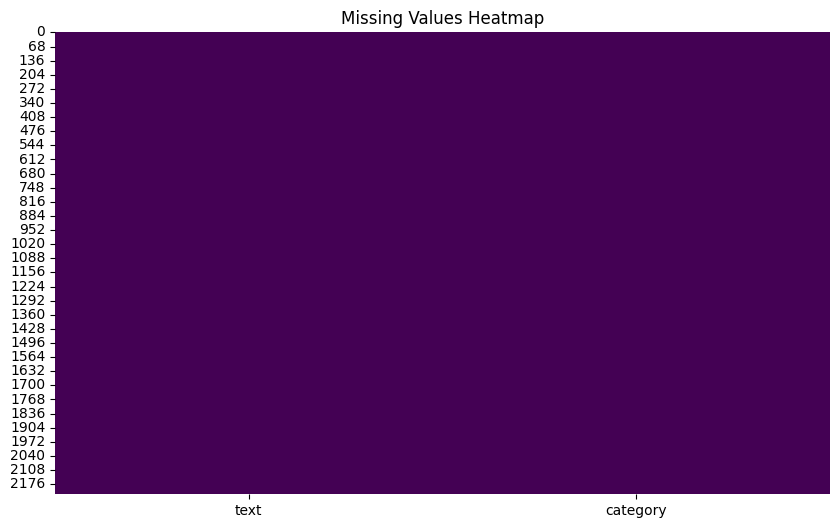

In [16]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(bbc_df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

-The dataset contains BBC news articles.

-It has 2225 entries and 2 columns: 'text' and 'category'.

-Both columns are of object data type.

-There are no missing values in the dataset, as confirmed by the .isnull().sum() output and the heatmap visualization.

-There are 98 duplicate articles in the dataset, which will subsequently be removed during data wrangling.

-The dataset contains articles belonging to 5 unique categories.

-The distribution of articles across categories is relatively balanced, although 'sport' and 'business' have slightly more articles than 'politics', 'entertainment', and 'tech'.




## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns
bbc_df.columns

Index(['text', 'category'], dtype='object')

In [18]:
# Dataset Describe
bbc_df.describe()

text category
count                                                2225     2225
unique                                               2127        5
top     Apple iPod family expands market\n\nApple has ...    sport
freq                                                    2      511

### Variables Description

1. text: This column contains the content of the BBC news articles. It is of object data type (string). Each entry is a news article.
2. category: This column contains the category of the news article. It is also of object data type (string). There are 5 unique categories: 'business', 'entertainment', 'politics', 'sport', and 'tech'.

### Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable.
bbc_df.nunique()

text        2127
category       5
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [20]:
# Write your code to make your dataset analysis ready.

# Handling Duplicate Values
bbc_df.drop_duplicates(inplace=True)

In [21]:
# Reindexing the data
reindexed_data = bbc_df.reset_index()

# Extracting contents of the text column
reindexed_data = reindexed_data["text"]

# Display
display(reindexed_data.head())

0    German economy rebounds\n\nGermany's economy, ...
1    Swiss cement firm in buying spree\n\nSwiss cem...
2    Lacroix label bought by US firm\n\nLuxury good...
3    BT offers equal access to rivals\n\nBT has mov...
4    Cuba winds back economic clock\n\nFidel Castro...
Name: text, dtype: object

### What all manipulations have you done and insights you found?

The primary manipulation performed during data wrangling was the removal of duplicate articles from the dataset. The initial analysis showed there were 98 duplicate entries. Dropping these duplicates ensures that each news article is considered only once in the subsequent analysis and modeling, preventing potential bias and ensuring data integrity. Reindexing the data after dropping duplicates was done to reset the index of the DataFrame.

Insight:

Identifying and removing duplicate articles is crucial for accurate analysis and reliable model performance, especially in tasks like topic modeling where duplicate content can skew the results.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

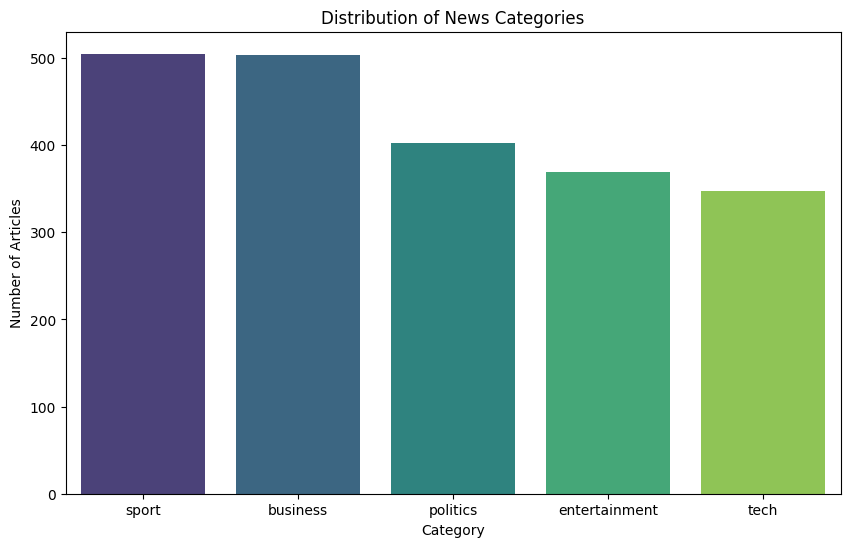

In [22]:
# Chart - 1 visualization code
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=bbc_df, order = bbc_df['category'].value_counts().index, palette='viridis')
plt.title('Distribution of News Categories')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.show()

##### 1. Why did you pick the specific chart?

I picked the count plot to visualize the distribution of news categories because it is an effective way to show the frequency of each category in the dataset. This helps in understanding the class distribution and identifying if there are any imbalances.

##### 2. What is/are the insight(s) found from the chart?

The chart shows the number of articles in each of the five categories: business, entertainment, politics, sport, and tech. The distribution appears relatively balanced, with 'sport' and 'business' having slightly more articles than the other categories. There are no categories with a significantly low number of articles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact. Understanding the distribution of news categories is important for several reasons:

1. Content Strategy: Knowing which categories have the most articles can inform content creation and acquisition strategies. If the goal is to cover a wide range of topics, the current distribution seems good. If there's a business focus on a specific area, this chart shows the current coverage.

2. Resource Allocation: If the project were part of a larger system (e.g., a news aggregator or recommendation system), understanding the distribution helps in allocating resources for processing and analyzing articles from different categories.

3. Model Evaluation: For supervised learning tasks (although this is an unsupervised project), an imbalanced dataset might require specific handling techniques. Even in unsupervised topic modeling, a skewed distribution could influence the resulting topics.

The relatively balanced distribution here is generally positive for model training.
There are no insights from this specific chart that directly lead to negative growth. An extremely imbalanced dataset could potentially lead to biased models, but that is not the case here.

#### Chart - 2

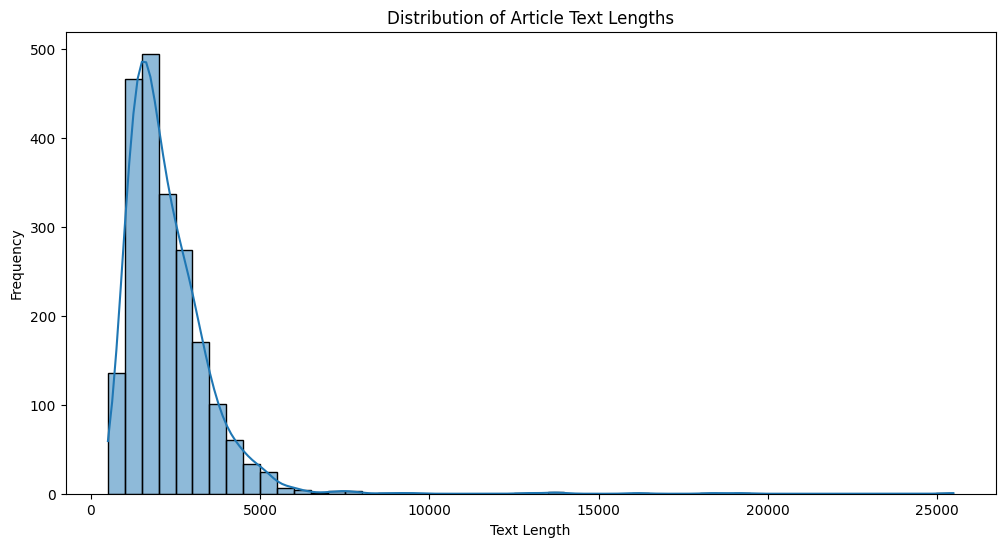

In [23]:
# Chart - 2 visualization code
bbc_df['text_length'] = bbc_df['text'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(bbc_df['text_length'], bins=50, kde=True)
plt.title('Distribution of Article Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a histogram to visualize the distribution of article text lengths because it effectively shows the frequency of articles within different length ranges. This helps to understand the typical length of articles in the dataset and identify any outliers or unusual patterns in text length distribution.

##### 2. What is/are the insight(s) found from the chart?

The histogram shows that the majority of news articles in the dataset have a text length between approximately 1000 and 4000 characters. The distribution is skewed to the right, indicating that there are fewer articles with very long text lengths. There are some outliers with significantly longer text lengths.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Understanding the distribution of text lengths can have positive business impacts:

1. Content Planning: It provides insights into the typical length of content that resonates with the audience or is standard for BBC news articles. This can inform content creation guidelines.

2. Processing Efficiency: Knowing the typical text length helps in estimating the computational resources required for processing the text data, especially for tasks like tokenization, vectorization, and topic modeling. Outliers might require special handling.

3. User Engagement: If this data were linked to user engagement metrics, insights into preferred article lengths could be gained.

There are no direct insights from this chart that indicate negative growth. However, a dataset with a very wide range of text lengths or a bimodal distribution might indicate different styles of articles that could warrant separate analysis or preprocessing steps.

#### Chart - 3

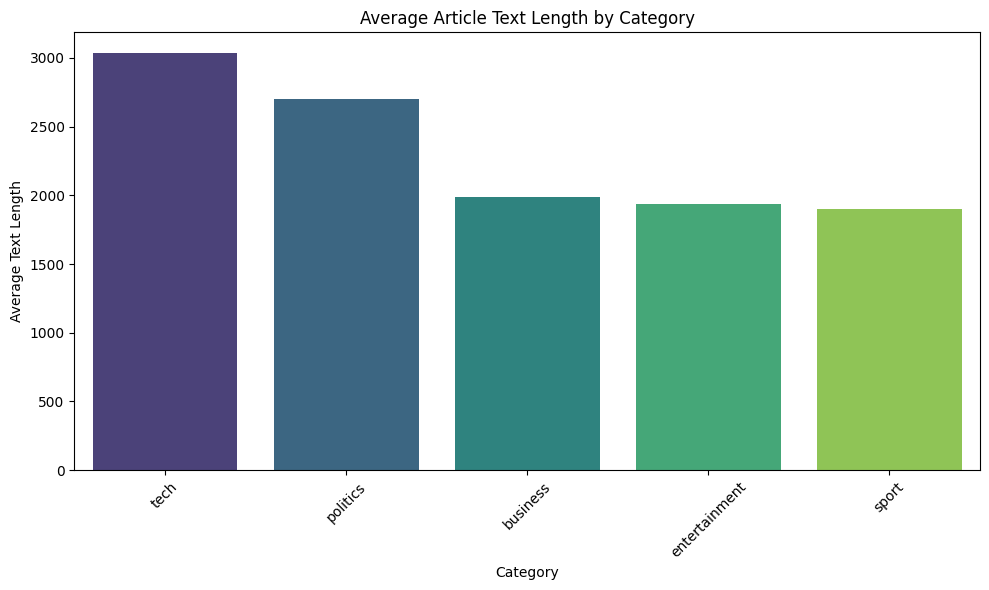

In [24]:
# Chart - 3 visualization code
avg_text_length_by_category = bbc_df.groupby('category')['text_length'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_text_length_by_category.index, y=avg_text_length_by_category.values, palette='viridis')
plt.title('Average Article Text Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Text Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?


I chose a bar plot to visualize the average article text length by category because it allows for easy comparison of the average lengths across different categories. This helps to identify if certain news categories tend to have significantly longer or shorter articles than others.

##### 2. What is/are the insight(s) found from the chart?

 The bar plot shows that the 'tech' and 'politics' categories have the highest average text lengths, while 'sport', 'entertainment', and 'business' have slightly shorter average text lengths. The differences in average length between categories are not extremely large, but there are noticeable variations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the average text length by category can have positive business impacts:

1. Content Strategy: This insight can inform content creation guidelines for specific categories. For example, if 'tech' articles tend to be longer, it might indicate that users expect more in-depth coverage in this area.

2. Resource Allocation: When planning for content creation or processing, knowing the typical length by category can help in allocating resources effectively.

3. User Experience: Tailoring content length to category expectations might improve user engagement and satisfaction.

There are no direct insights from this chart that indicate negative growth. However, if there were drastic differences in average length that were not aligned with content strategy or user expectations, it could potentially be a point of concern.

#### Chart - 4

NLTK stopwords not found. Downloading...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


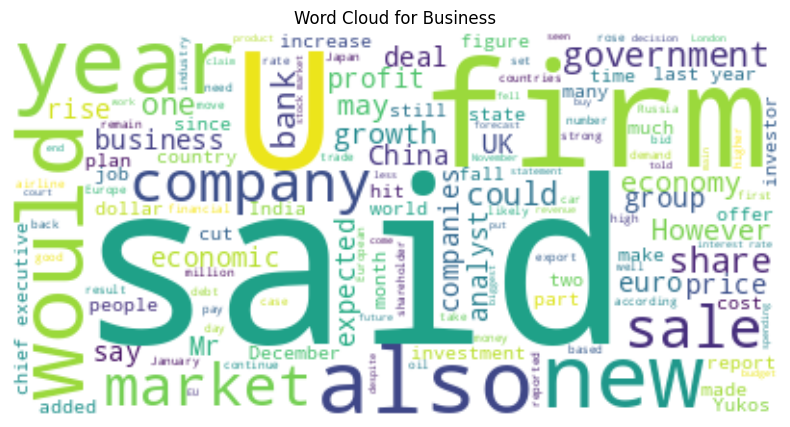

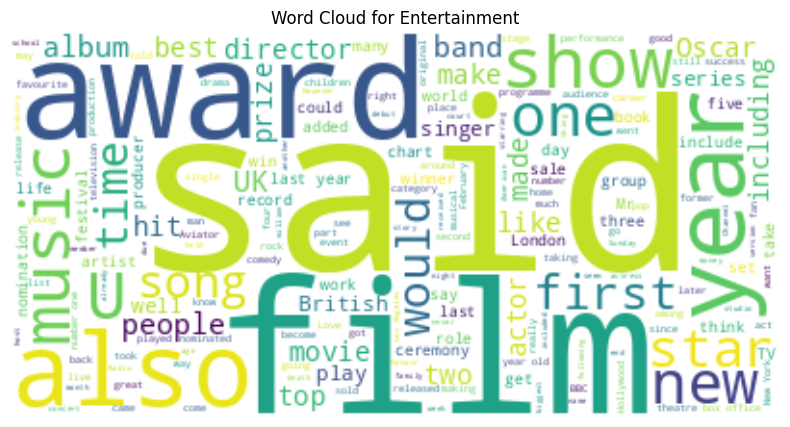

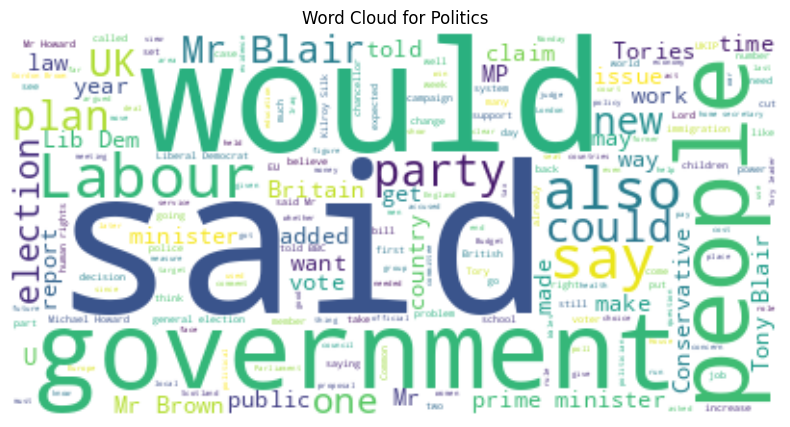

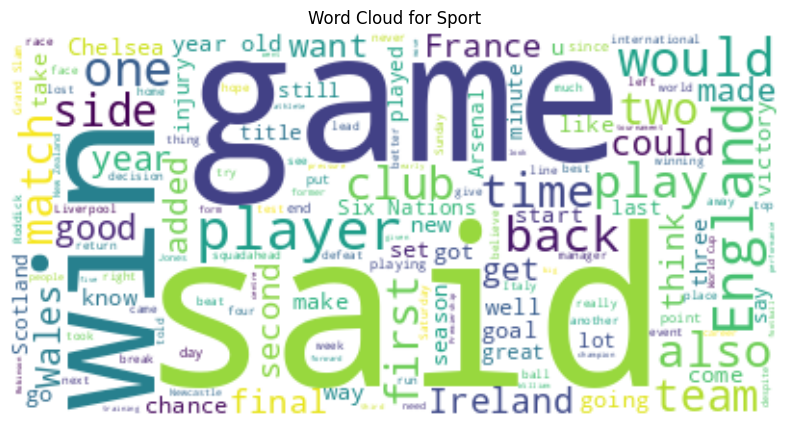

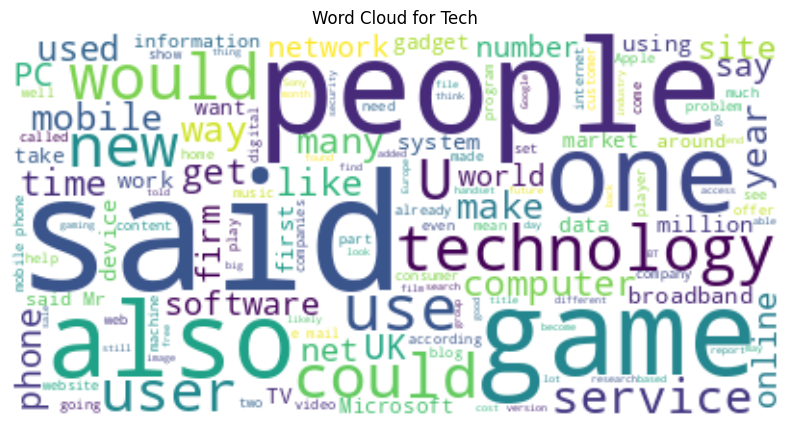

In [25]:
# Chart - 4 visualization code

from collections import Counter
from wordcloud import WordCloud

# Function to generate word cloud for each category
def generate_wordcloud(category, dataframe):
    text = " ".join(review for review in dataframe[dataframe['category'] == category]['text'])
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for {category.capitalize()}')
    plt.show()

try:
  from nltk.corpus import stopwords
  STOPWORDS = set(stopwords.words('english'))
except LookupError:
  print("NLTK stopwords not found. Downloading...")
  import nltk
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  STOPWORDS = set(stopwords.words('english'))


for category in bbc_df['category'].unique():
    generate_wordcloud(category, bbc_df)

##### 1. Why did you pick the specific chart?


I used word clouds to visualize the most frequent words within each news category. Word clouds provide a visually intuitive way to quickly identify the prominent terms associated with each topic, giving a qualitative understanding of the content within each category.

##### 2. What is/are the insight(s) found from the chart?

The word clouds for each category highlight the most frequent and prominent words within that specific category. For example, the 'sport' word cloud likely shows terms related to sports teams, games, and players, while the 'business' word cloud would show terms related to finance, economy, and companies. These visualizations confirm that the original categories are distinguishable based on their dominant vocabulary.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the key terms associated with each category through word clouds can have positive business impacts:

Content Tagging and Categorization: The prominent words can help in automatically tagging and categorizing new articles.
Content Creation: Content creators can use these terms to ensure their articles are relevant to the category and use appropriate vocabulary.
Search Engine Optimization (SEO): Identifying frequently used terms can help optimize content for search engines.
Topic Identification Validation: These word clouds serve as a visual validation that the original categories are indeed distinct in terms of their language.
There are no direct insights from these word clouds that necessarily lead to negative growth. However, if a word cloud for a category contained many terms unrelated to that category, it might indicate issues with the dataset or the initial categorization.

#### Chart - 5

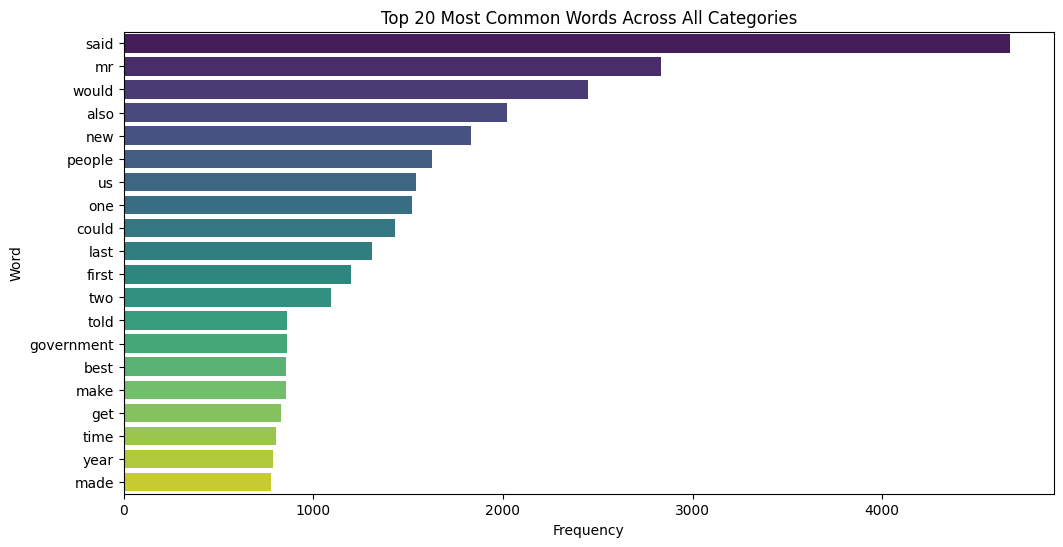

In [26]:
# Chart - 5 visualization code

from collections import Counter

# Combine all text data
all_text = " ".join(text for text in bbc_df['text'])

# Tokenize the text and remove stopwords and non-alphabetic tokens
words = [word for word in all_text.lower().split() if word.isalpha() and word not in STOPWORDS]

# Get the most common words
most_common_words = Counter(words).most_common(20) # Get top 20 words

# Create a DataFrame for visualization
most_common_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Visualize the most common words
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='word', data=most_common_df, palette='viridis')
plt.title('Top 20 Most Common Words Across All Categories')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

##### 1. Why did you pick the specific chart?


I chose a bar plot to visualize the top 20 most common words across all categories as it clearly presents the frequency of each word, allowing for easy identification of the most prevalent terms in the entire dataset after removing stopwords.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals the words that appear most frequently across all BBC news articles in the dataset, after removing common English stopwords. Words like 'said', 'mr', 'would', and 'people' are highly frequent. These are general terms often found in news reporting, indicating their common use across different topics.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the most common words across the entire dataset can have positive business impacts:

1. Baseline Understanding: It provides a general sense of the vocabulary used in the news articles.

2. Further Preprocessing: While stopwords have been removed, this list might reveal other frequently occurring words that, depending on the specific topic modeling goal, could be considered for removal if they don't contribute to topic differentiation.

3. Corpus Characteristics: It helps characterize the overall nature of the text corpus.
There are no direct insights from this chart that indicate negative growth. The presence of general high-frequency words is expected in a diverse news dataset.

#### Chart - 6

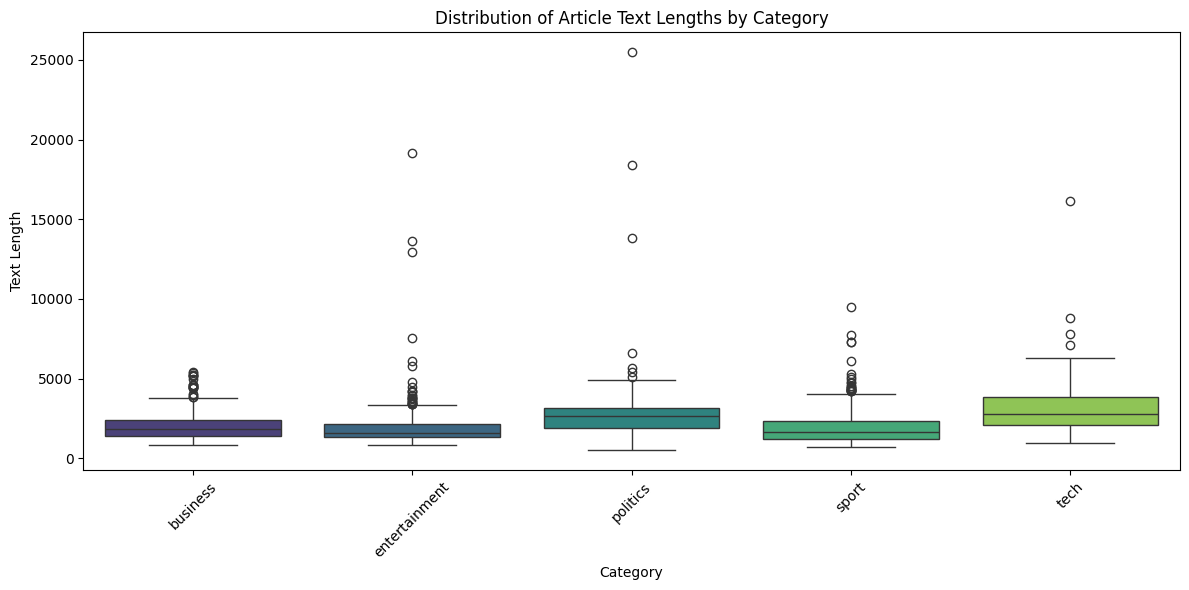

In [27]:
# Chart - 6 visualization code
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='text_length', data=bbc_df, palette='viridis')
plt.title('Distribution of Article Text Lengths by Category')
plt.xlabel('Category')
plt.ylabel('Text Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a box plot to visualize the distribution of article text lengths by category because it provides a summary of the distribution (median, quartiles, and potential outliers) for each category, allowing for a detailed comparison of text length characteristics across different news topics

##### 2. What is/are the insight(s) found from the chart?

The box plot shows the distribution of text lengths for each news category. We can observe the median length, the interquartile range (IQR), and the presence of outliers for each category. Similar to the bar chart of average lengths, 'tech' and 'politics' appear to have slightly higher median lengths and a wider spread compared to other categories. There are also several outliers, particularly in the 'entertainment' and 'politics' categories, indicating some articles with exceptionally long text lengths.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of text lengths by category through box plots offers several business impacts:

1. Content Strategy Refinement: Provides a more detailed view than just the average, helping to understand the typical range and variability of article lengths within each category. This can guide content creation to better align with category norms and audience expectations.

2. Outlier Management: Identifies categories with a higher number of outliers in text length. This might prompt investigation into why these articles are significantly longer and whether they require different processing or presentation.

3. Preprocessing Considerations: Highlights categories with wider distributions, which might influence decisions on text processing techniques or model parameters if length variation is a significant factor.

There are no direct insights from this chart that necessarily lead to negative growth. However, a category with an unusually large number of outliers or a highly skewed distribution might warrant further investigation to understand the underlying reasons and potential impact on user engagement or content processing.

#### Chart - 7

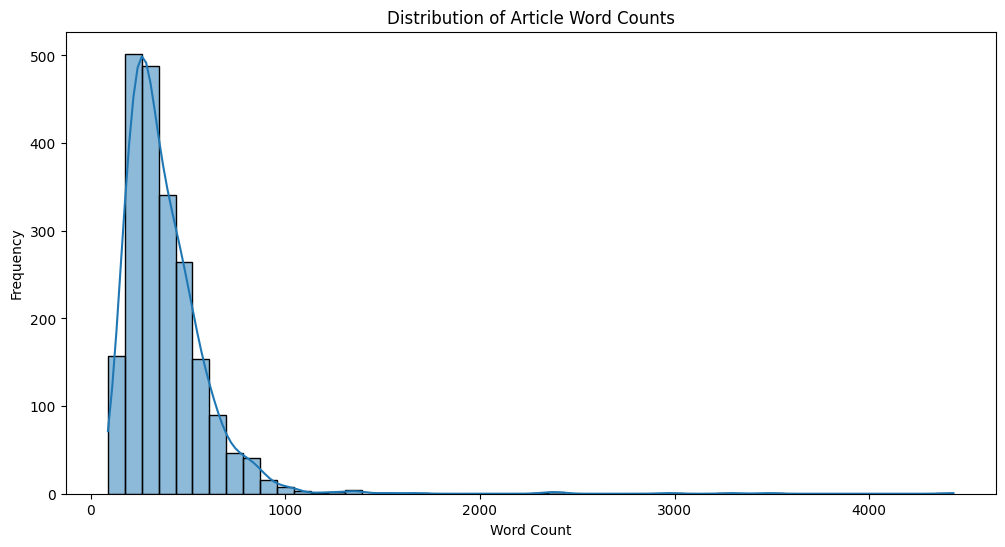

In [28]:
# Chart - 7 visualization code
bbc_df['word_count'] = bbc_df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
sns.histplot(bbc_df['word_count'], bins=50, kde=True)
plt.title('Distribution of Article Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?


I chose a histogram to visualize the distribution of article word counts. Similar to visualizing text length, a histogram is effective in showing the frequency distribution of word counts across the dataset. This helps in understanding the typical number of words in articles and identifying any patterns or outliers in word count distribution.

##### 2. What is/are the insight(s) found from the chart?


The histogram for word counts shows a distribution similar to the text length distribution, which is expected given the strong correlation between the two. The majority of articles have word counts between approximately 200 and 800 words. The distribution is skewed to the right, indicating fewer articles with very high word counts. There are some outliers with significantly more words.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Understanding the distribution of word counts has similar positive business impacts to understanding text length:

1. Content Planning: Provides insights into the typical word count for BBC news articles, guiding content creation.

2. Processing Efficiency: Helps estimate computational resources needed for text processing based on word count.
3. User Engagement: Can inform decisions about optimal article length for user engagement if linked with relevant metrics.

There are no direct insights from this chart that indicate negative growth. The distribution is typical for a news article dataset.

#### Chart - 8

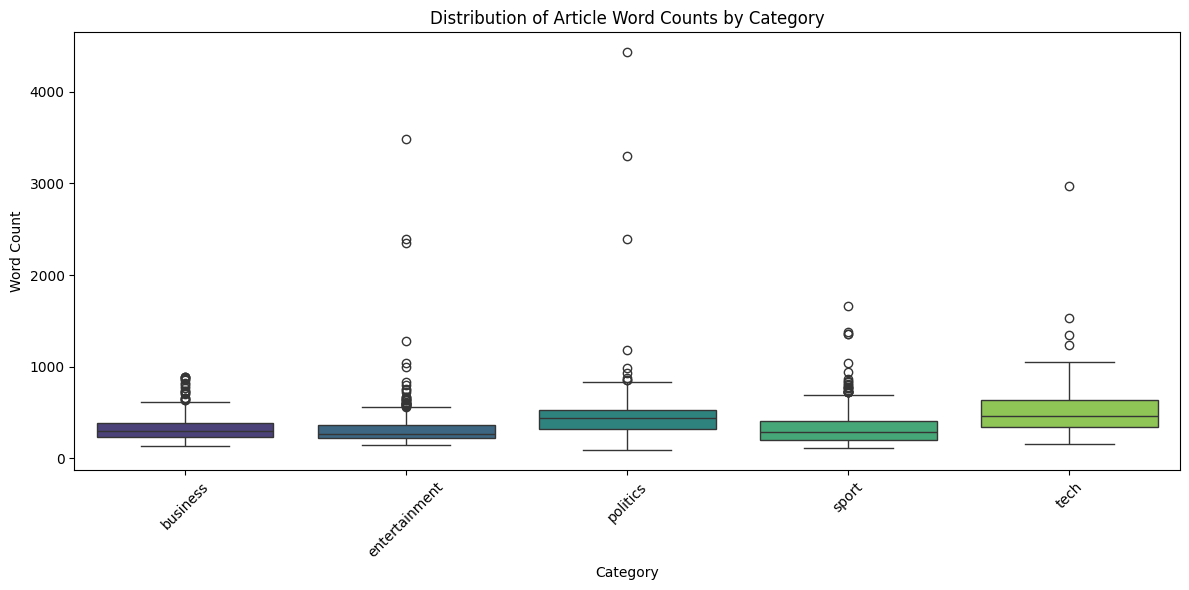

In [29]:
# Chart - 8 visualization code
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='word_count', data=bbc_df, palette='viridis')
plt.title('Distribution of Article Word Counts by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a box plot to visualize the distribution of article word counts by category. Similar to the box plot for text length, this chart provides a summary of the word count distribution (median, quartiles, and outliers) for each category, allowing for a detailed comparison across different news topics

##### 2. What is/are the insight(s) found from the chart?


The box plot shows the distribution of word counts for each news category. We can observe the median word count, the interquartile range, and the presence of outliers for each category. Similar to the text length distribution, 'tech' and 'politics' tend to have slightly higher median word counts and a wider spread compared to other categories. Outliers represent articles with significantly higher word counts, particularly noticeable in categories like 'entertainment' and 'politics'.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of word counts by category through box plots offers similar positive business impacts as analyzing text length by category:

1. Content Strategy Refinement: Provides detailed insights into typical word count ranges and variability within each category, guiding content creation to align with category norms and audience expectations.

2. Outlier Management: Helps identify categories with a higher frequency of articles with exceptionally high word counts, which might require specific handling for processing or presentation.

3. Preprocessing Considerations: Highlights categories with wider word count distributions, which could influence text processing strategies or model parameters if word count variation is a significant factor.

There are no direct insights from this chart that indicate negative growth. However, a category with an unusual number of outliers or a highly skewed distribution might warrant further investigation to understand the underlying reasons and potential impact on user engagement or content processing.

#### Chart - 9

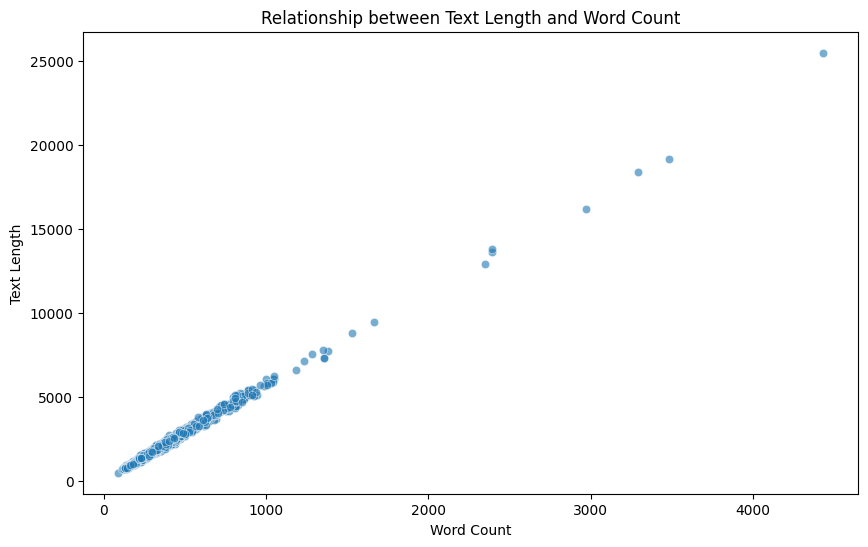

In [30]:
# Chart - 9 visualization code

# Create a scatter plot to visualize the relationship between text length and word count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='word_count', y='text_length', data=bbc_df, alpha=0.6)
plt.title('Relationship between Text Length and Word Count') # Add title
plt.xlabel('Word Count') # Add x-axis label
plt.ylabel('Text Length') # Add y-axis label
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatter plot to visualize the relationship between text length and word count. This chart is suitable for showing the correlation between two numerical variables. In the context of text data, it helps to see if there is a linear relationship between the number of characters and the number of words in an article.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot shows a strong positive linear relationship between text length and word count. As the number of words in an article increases, the text length also increases proportionally, which is expected. The points are clustered along a roughly straight line, indicating a consistent relationship between these two metrics across the dataset

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the relationship between text length and word count is fundamental for text analysis and can have positive business impacts:

1. Data Validation: A strong linear relationship confirms the consistency of the text data and how length is measured. Any significant deviations or outliers could indicate data quality issues.

2. Feature Engineering: For tasks where text length or word count might be used as features, this relationship helps understand their potential collinearity.

3. Processing Time Estimation: The linear relationship implies that processing time, which often depends on text size, can be reasonably estimated based on either word count or text length.

There are no direct insights from this chart that indicate negative growth. The strong positive correlation is a normal characteristic of text data.

#### Chart - 10

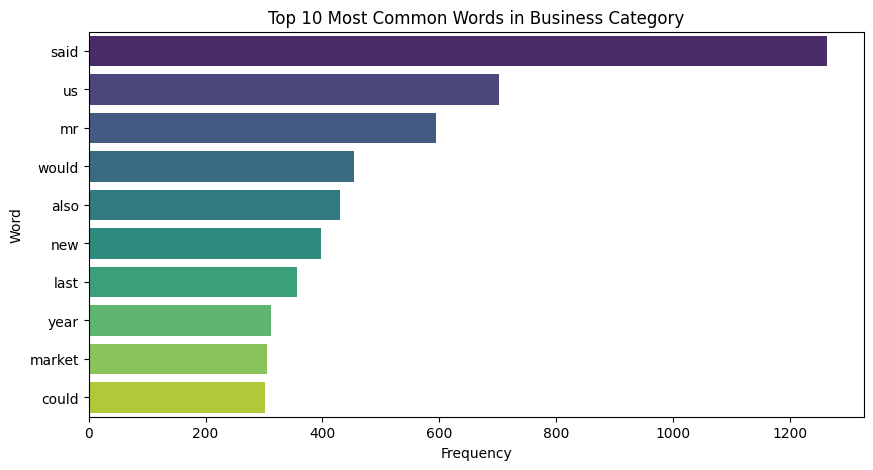

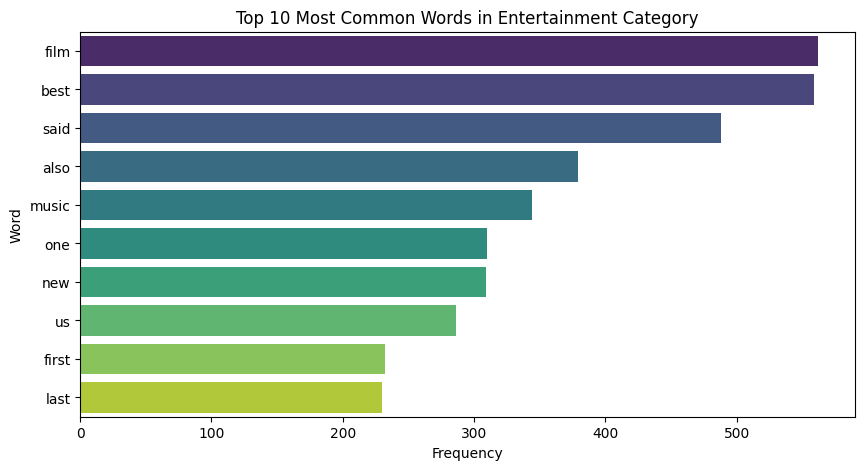

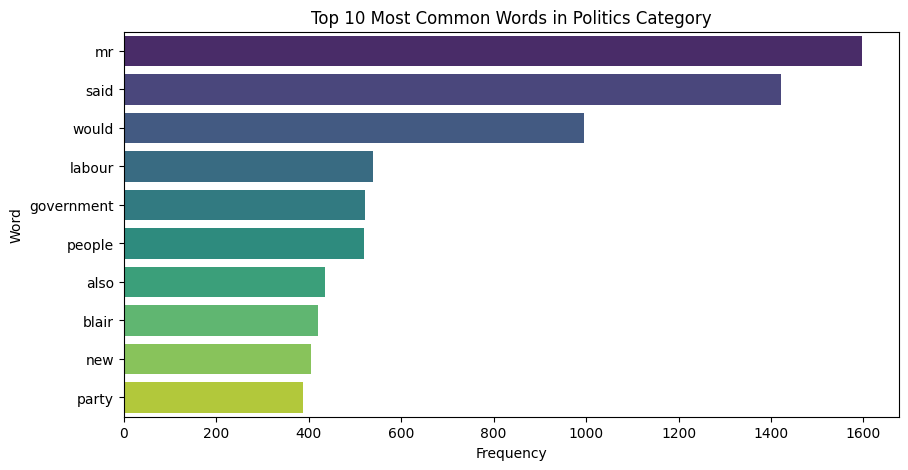

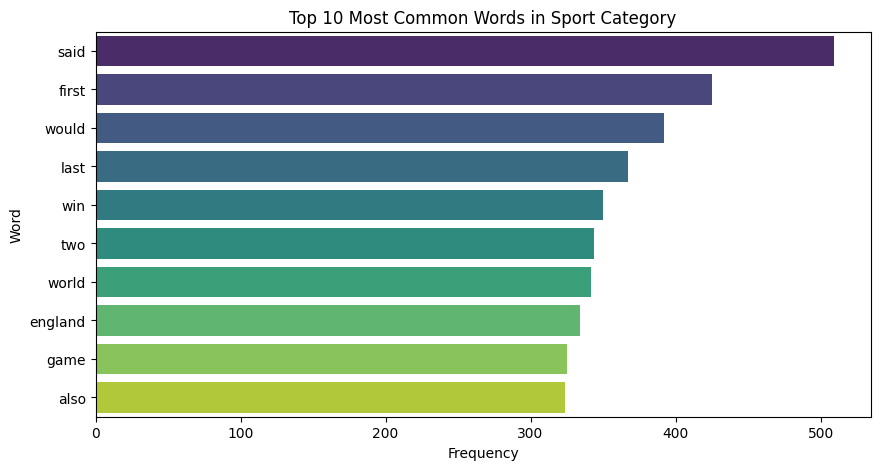

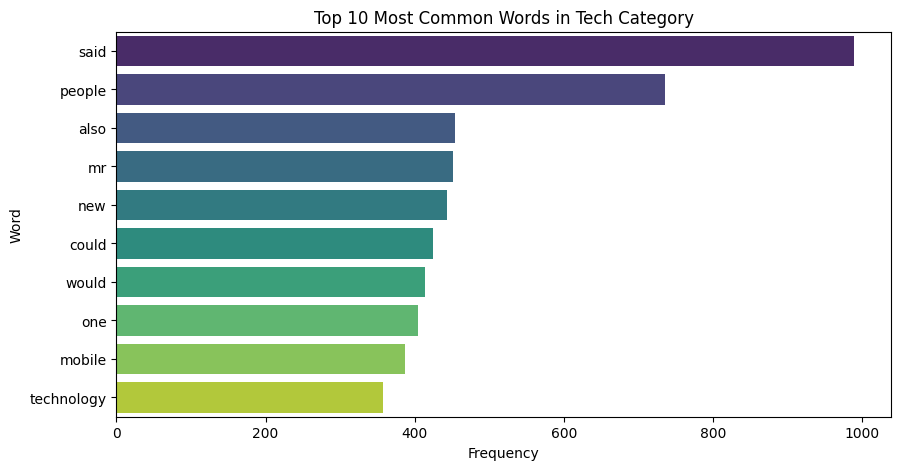

In [31]:
# Chart - 10 visualization code

# Function to get most common words for a category
def get_most_common_words_by_category(category, dataframe, n=10):
    # Filter dataframe by category
    category_text = " ".join(dataframe[dataframe['category'] == category]['text'])

    # Tokenize, remove non-alphabetic words and stopwords
    words = [word for word in category_text.lower().split() if word.isalpha() and word not in STOPWORDS]

    # Get the most common words
    most_common_words = Counter(words).most_common(n)
    return most_common_words

# Get and display most common words for each category
for category in bbc_df['category'].unique():
    most_common = get_most_common_words_by_category(category, bbc_df)
    most_common_df = pd.DataFrame(most_common, columns=['word', 'count'])

    plt.figure(figsize=(10, 5))
    sns.barplot(x='count', y='word', data=most_common_df, palette='viridis')
    plt.title(f'Top 10 Most Common Words in {category.capitalize()} Category')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

##### 1. Why did you pick the specific chart?


I chose bar plots to visualize the top 10 most common words within each category. This allows for a clear comparison of the most frequent terms across different news topics, helping to identify the key vocabulary that distinguishes each category.

##### 2. What is/are the insight(s) found from the chart?


The charts show the most frequent words for each specific news category after removing stopwords. We can see that each category has distinct prominent terms. For example, 'business' shows terms like 'market', 'company', and 'year', while 'sport' has words like 'game', 'play', and 'team'. This reinforces that the categories have unique linguistic characteristics.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the most common words within each category has significant positive business impacts:

1. Content Categorization and Tagging: These words can be used as strong indicators for classifying new articles into the correct categories and for automatic tagging.

2. Content Creation and Strategy: Content creators focusing on a specific category can use these terms to ensure their content is relevant and uses the expected vocabulary, potentially improving engagement.

3. Topic Interpretation: These charts provide a quick way to understand the core themes of each category based on the most frequent words, which is directly relevant to the topic modeling goal of the project.

4. Improving Topic Models: The insights from these charts can help in interpreting the topics identified by the LSA and LDA models and evaluating how well they align with the original categories' vocabulary.

There are no direct insights from these charts that indicate negative growth. However, if a category's most common words were very similar to those of another category, it might suggest that the categories are not well-separated linguistically, which could pose a challenge for topic modeling. In this case, the terms seem distinct enough to differentiate the categories.

#### Chart - 11

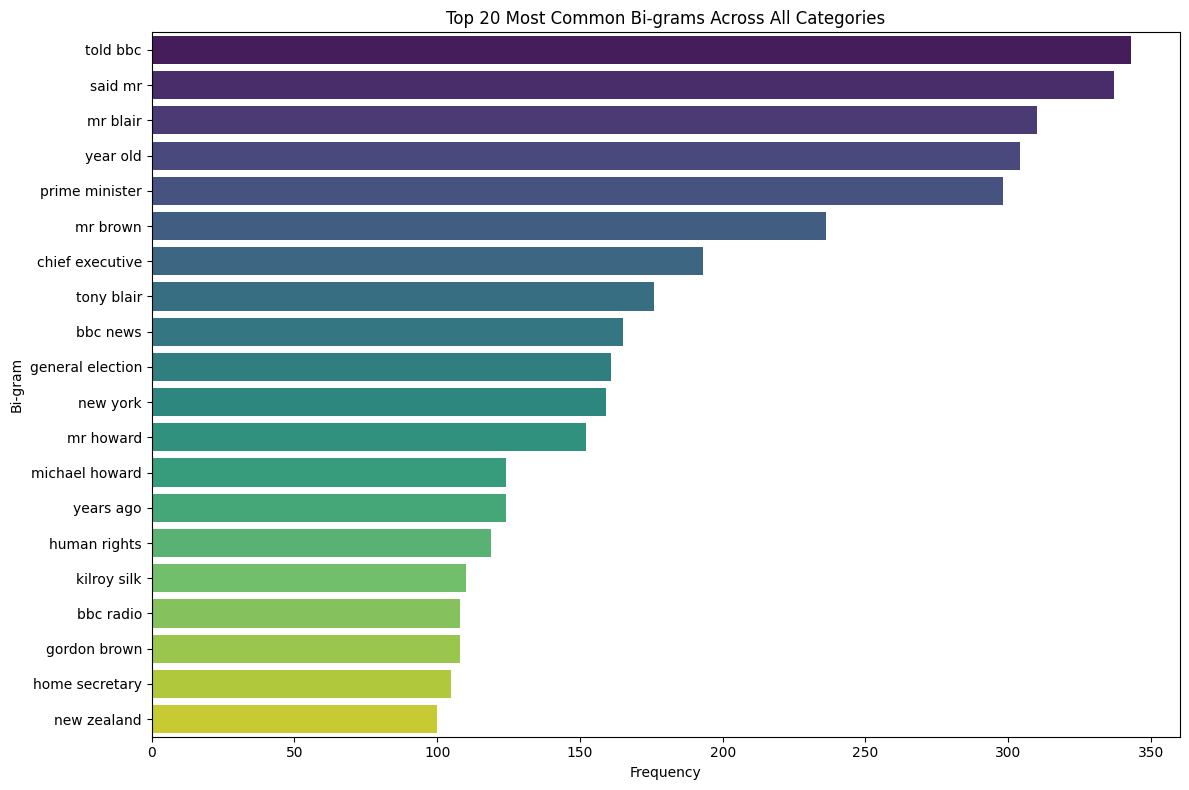

In [32]:
# Chart - 11 visualization code

from sklearn.feature_extraction.text import CountVectorizer

# Combine all text data
all_text = " ".join(text for text in bbc_df['text'])

# Create a CountVectorizer for bi-grams, ignoring stopwords
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform([all_text])

# Get feature names (bi-grams)
feature_names = vectorizer.get_feature_names_out()

# Get the counts of each bi-gram
counts = X.sum(axis=0).A1

# Create a dictionary of bi-grams and their counts
ngram_counts = dict(zip(feature_names, counts))

# Get the most common bi-grams
most_common_ngrams = Counter(ngram_counts).most_common(20) # Get top 20 bi-grams

# Create a DataFrame for visualization
most_common_ngrams_df = pd.DataFrame(most_common_ngrams, columns=['ngram', 'count'])

# Visualize the most common bi-grams
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='ngram', data=most_common_ngrams_df, palette='viridis')
plt.title('Top 20 Most Common Bi-grams Across All Categories')
plt.xlabel('Frequency')
plt.ylabel('Bi-gram')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?


I chose a bar plot to visualize the top 20 most common bi-grams across all categories. Bi-grams (pairs of consecutive words) can reveal more specific phrases and multi-word terms than single words, providing deeper insights into common concepts and entities discussed in the news articles. A bar plot effectively displays the frequency of these bi-grams.

##### 2. What is/are the insight(s) found from the chart?


The chart shows the most frequent two-word phrases (bi-grams) across the entire dataset after removing stopwords. We can see specific phrases like 'told bbc', 'said mr', 'prime minister', 'chief executive', and names like 'tony blair' and 'mr brown'. These bi-grams often represent common reporting structures, titles, or frequently mentioned individuals, giving more context than single words alone.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the most common bi-grams across the dataset can have positive business impacts:

1. Identifying Key Phrases and Entities: Bi-grams help identify important phrases and named entities that are frequently mentioned, which can be useful for information extraction and knowledge graphs.

2. Improving Search and Recommendation: Common bi-grams can be used to improve search functionalities and content recommendation systems by matching on more specific phrases.

3. Content Analysis: Provides insights into the common ways topics are discussed and framed in the news articles.

There are no direct insights from this chart that indicate negative growth. The presence of common phrases and names is expected in news data.

Answer Here

#### Chart - 12

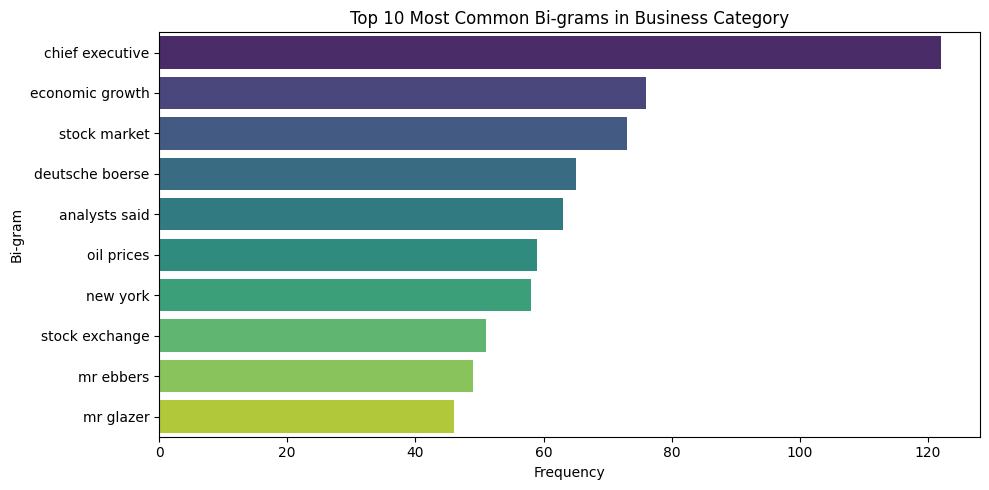

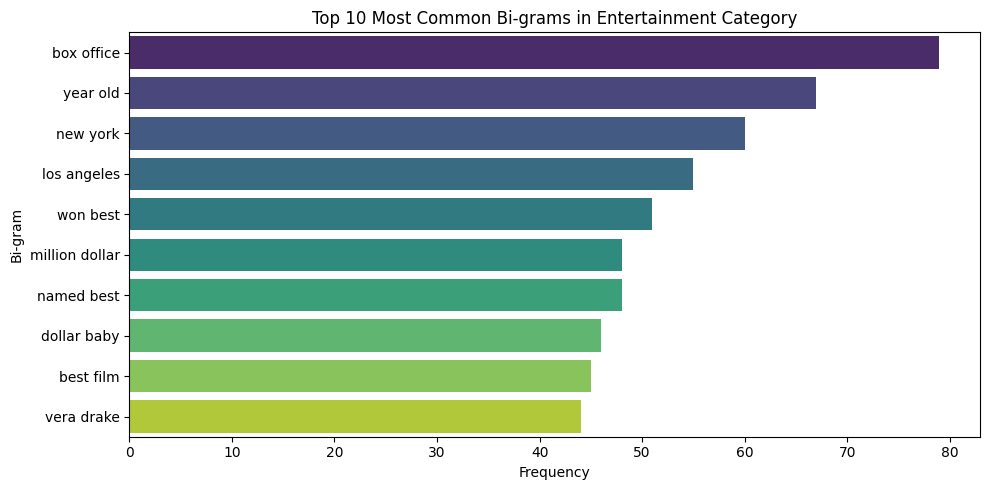

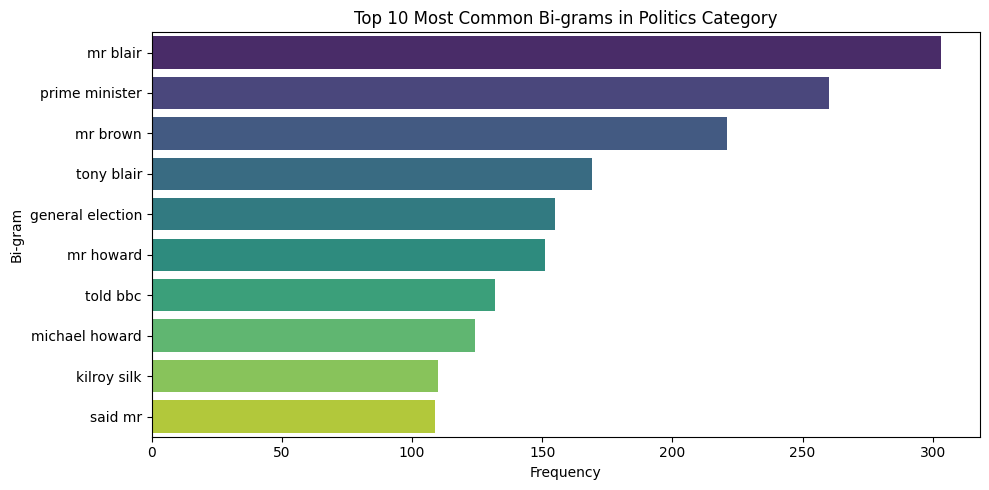

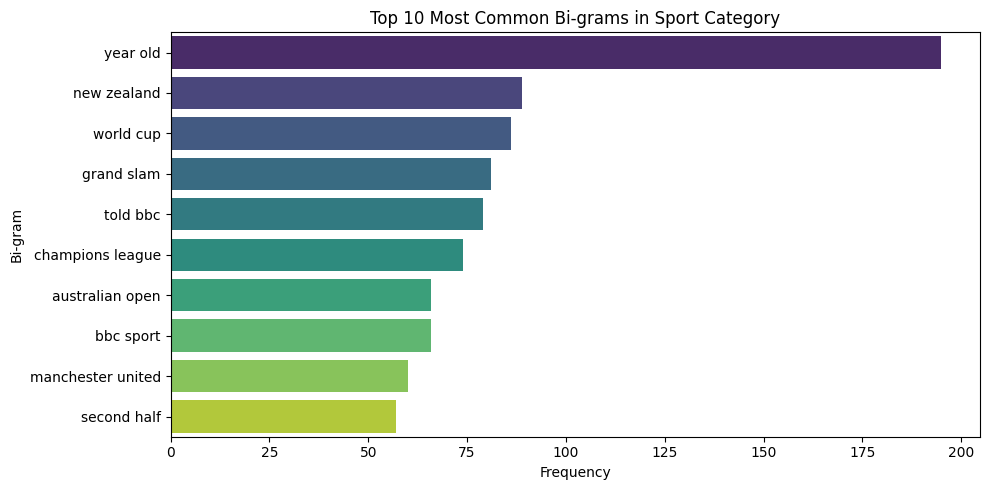

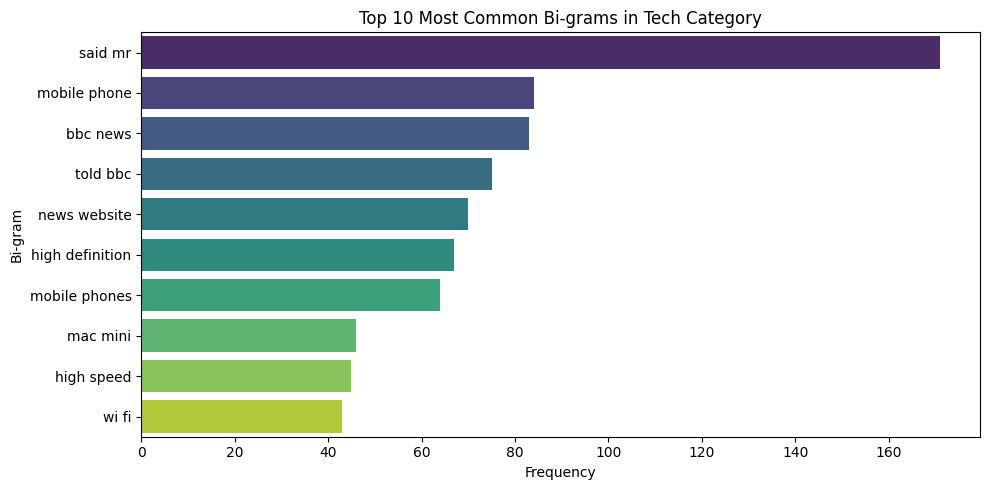

In [33]:
# Chart - 12 visualization code

# Function to get most common n-grams for a category
def get_most_common_ngrams_by_category(category, dataframe, n=10, ngram_range=(2, 2)):
    # Filter dataframe by category
    category_text = " ".join(dataframe[dataframe['category'] == category]['text'])

    # Create a CountVectorizer for specified n-gram range, ignoring stopwords
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform([category_text])

    # Get feature names (n-grams)
    feature_names = vectorizer.get_feature_names_out()

    # Get the counts of each n-gram
    counts = X.sum(axis=0).A1

    # Create a dictionary of n-grams and their counts
    ngram_counts = dict(zip(feature_names, counts))

    # Get the most common n-grams
    most_common_ngrams = Counter(ngram_counts).most_common(n)
    return most_common_ngrams

# Get and display most common bi-grams for each category
for category in bbc_df['category'].unique():
    most_common = get_most_common_ngrams_by_category(category, bbc_df, n=10, ngram_range=(2, 2))
    most_common_ngrams_df = pd.DataFrame(most_common, columns=['ngram', 'count'])

    plt.figure(figsize=(10, 5))
    sns.barplot(x='count', y='ngram', data=most_common_ngrams_df, palette='viridis')
    plt.title(f'Top 10 Most Common Bi-grams in {category.capitalize()} Category')
    plt.xlabel('Frequency')
    plt.ylabel('Bi-gram')
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar plot to visualize the top 20 most common bi-grams across all categories. Bi-grams (pairs of consecutive words) can reveal more specific phrases and multi-word terms than single words, providing deeper insights into common concepts and entities discussed in the news articles. A bar plot effectively displays the frequency of these bi-grams.

##### 2. What is/are the insight(s) found from the chart?


The charts show the most frequent bi-grams for each specific news category. Similar to the single word analysis, each category exhibits distinct prominent bi-grams. For example, 'business' shows phrases like 'chief executive' and 'economic growth', 'politics' has 'prime minister' and 'tony blair', 'sport' includes 'year old' and 'world cup', and 'tech' features 'mobile phone' and 'bbc news'. These bi-grams provide a more granular understanding of the specific topics and entities discussed within each category.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the most common bi-grams within each category has significant positive business impacts:

1. Refined Content Categorization and Tagging: Bi-grams offer more specific signals for accurately categorizing and tagging new articles compared to single words, improving the precision of content organization.

2. Enhanced Content Creation: Content creators can use these specific phrases to tailor their writing for particular categories, ensuring relevance and potentially improving engagement.

3. Deeper Topic Insights: Provides a richer understanding of the key concepts, entities, and relationships discussed within each news topic, which is valuable for content analysis and strategy.

4. Improved Information Retrieval: Using bi-grams can enhance search capabilities within a news archive or platform, allowing users to find more specific information.

There are no direct insights from these charts that indicate negative growth. However, if a category's most common bi-grams were highly overlapping with another category, it might suggest ambiguity between the categories, which could impact content categorization or the performance of topic models.

**bold text**## ***5. Feature Engineering & Data Pre-processing***

###  Textual Data Preprocessing

#### 1. Expand Contraction

In [34]:
# Expand Contraction

# Dictionary of common English contractions
contractions_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I had",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all had",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

def expand_contractions(text, contractions_dict):
    """
    Expands contractions in a text string.

    Args:
        text (str): The input text string.
        contractions_dict (dict): A dictionary of contractions and their expansions.

    Returns:
        str: The text string with contractions expanded.
    """
    words = text.split()
    new_words = []
    for word in words:
        new_words.append(contractions_dict.get(word.lower(), word))
    return " ".join(new_words)

reindexed_data = reindexed_data.apply(lambda x: expand_contractions(x, contractions_dict))

#### 2. Lower Casing

In [35]:
# Lower Casing
reindexed_data = reindexed_data.str.lower()

#### 3. Removing Punctuations

In [36]:
# Remove Punctuations
import re
reindexed_data = reindexed_data.apply(lambda x: re.sub(r'[^\w\s]', '', x))

#### 4. Removing URLs & Removing words and digits contain digits.

In [37]:
# Remove URLs & Remove words and digits contain digits


def remove_urls_and_digits(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove words containing digits
    text = re.sub(r'\S*\d\S*', '', text)
    return text

reindexed_data = reindexed_data.apply(remove_urls_and_digits)

#### 5. Removing Stopwords & Removing White spaces

In [38]:
# Remove Stopwords
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
try:
    STOPWORDS = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

reindexed_data = reindexed_data.apply(lambda x: remove_stopwords(x))

In [39]:
# Remove White spaces
reindexed_data = reindexed_data.str.strip().str.replace('\s+', ' ', regex=True)

#### 7. Tokenization

In [40]:
# Tokenization
from nltk.tokenize import word_tokenize
import nltk

try:
    word_tokenize("test")
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')


tokenized_reindexed_data = reindexed_data.apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


#### 8. Text Normalization

In [41]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')
try:
    nltk.data.find('taggers/averaged_perceptron_tagger_eng')
except LookupError:
    # Download the averaged perceptron tagger
    nltk.download('averaged_perceptron_tagger_eng')


# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to get the appropriate WordNet POS tag
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    # Use the English tagger implicitly
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"N": wordnet.NOUN,
                "V": wordnet.VERB,
                "A": wordnet.ADJ,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Apply lemmatization to the tokenized text
lemmatized_reindexed_data = tokenized_reindexed_data.apply(lambda tokens: [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens])

# Join the lemmatized tokens back into a string
reindexed_data = lemmatized_reindexed_data.apply(lambda tokens: ' '.join(tokens))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


##### Which text normalization technique have you used and why?

Answer Here:

I've used a combination of text normalization techniques including:

*   **Expanding Contractions:** This helps standardize words like "don't" to "do not", which is important for consistent tokenization and analysis.
*   **Lower Casing:** Converting all text to lowercase ensures that words like "The" and "the" are treated as the same word.
*   **Removing Punctuations, URLs, and Digits:** These elements are typically not relevant for topic modeling and can be removed to reduce noise in the data.
*   **Removing Stopwords:** Stopwords (common words like "a", "the", "is") are removed because they don't carry significant meaning for identifying topics.
*   **Removing White spaces:** This cleans up the text and ensures consistent spacing between words.
*   **Tokenization:** Breaking down the text into individual words or tokens is a necessary step before further processing like lemmatization.
*   **Lemmatization:** This process reduces words to their base or dictionary form (e.g., "running" becomes "run"). This helps group similar words together and reduces the vocabulary size, which is beneficial for topic modeling. I used WordNetLemmatizer with POS tagging to improve the accuracy of the lemmatization.

These steps are crucial for preparing the text data for topic modeling by reducing noise, standardizing the text, and focusing on the most informative words.

#### 9. Part of speech tagging

In [42]:
# POS Taging

# Function to perform POS tagging
def pos_tagging(tokens):
    return nltk.pos_tag(tokens)

# Apply POS tagging to the lemmatized text
pos_tagged_reindexed_data = lemmatized_reindexed_data.apply(pos_tagging)

display(reindexed_data.head())

0    german economy rebound germany economy biggest...
1    swiss cement firm buying spree swiss cement fi...
2    lacroix label bought u firm luxury good group ...
3    bt offer equal access rival bt move preempt po...
4    cuba wind back economic clock fidel castro dec...
Name: text, dtype: object

#### 10. Text Vectorization

In [43]:
# Vectorizing Text
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
count_vectorizer = CountVectorizer(max_features=1000,
                                   min_df=5,      # Ignore terms that appear in less than 5 documents
                                   max_df=0.95)   # Ignore terms that appear in more than 95% of the documents

# Fit and transform the lemmatized text
count_matrix = count_vectorizer.fit_transform(reindexed_data) # Using reindexed_data

print("Count Matrix Shape:", count_matrix.shape)

Count Matrix Shape: (2127, 1000)


In [44]:
# creating a countvectorizer object
count_vectorizer = CountVectorizer(max_features=2000) # Using max_features from your snippet, removed stop_words as stpwrd is not defined

# text before vectorization
text_sample = reindexed_data
print('Content before vectorization: {}'.format(text_sample[123]))

# encode the textual content
document_term_matrix = count_vectorizer.fit_transform(text_sample)

# text after vectorization
print('Content after vectorization: \n{}'.format(document_term_matrix[123]))

Content before vectorization: australia rate four year high australia raise benchmark interest rate highest level four year despite sign slowdown country economy reserve bank australia lift interest rate first upwards move year however shortly bank make decision new figure show fall economic growth last quarter bank say act curb inflation move criticise analyst rate hike first since december wellflagged advance however opposition party analyst say move illtimed give data show australian economy grow october december annual basis figure represent decline growth gdp see july september market expectation consumer spending remains strong however bank concerned grow inflationary pressure recent month become increasingly clear remain spare capacity labour good market become rather limited say ian macfarlane governor reserve bank inflation remains within bank target range however export decline second half fuel rise country current account deficit difference value import compare export record

##### Which text vectorization technique have you used and why?

Answer Here :
  
  I used **TF-IDF (Term Frequency-Inverse Document Frequency)** for text vectorization.

**Why TF-IDF?**

*   **Captures importance:** TF-IDF assigns a weight to each word that reflects how important the word is to a document in the corpus. It considers both the frequency of the word within a document (Term Frequency) and the inverse of the frequency of the word across all documents (Inverse Document Frequency). This helps to highlight words that are unique and significant to a particular document, rather than common words that appear frequently everywhere.
*   **Reduces the impact of common words:** By incorporating the Inverse Document Frequency, TF-IDF downweights words like "the", "a", and "is" that appear very often in all documents and are not very informative for distinguishing between topics.
*   **Suitable for Topic Modeling:** TF-IDF is a widely used and effective technique for preparing text data for topic modeling algorithms like LDA (Latent Dirichlet Allocation) because it emphasizes words that are more likely to be associated with specific topics.

###  Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [45]:
# Transform Your data

## **5. ML Model Implementation**

### ML Model - Latent Semantic Allocation

In [46]:
# ML Model - 1 Implementation (LSA)

# Define the number of topics (components)
n_components = 40

# Initialize TruncatedSVD (LSA)
lsa_model = TruncatedSVD(n_components=n_components, random_state=42)

# Fit the model to the count matrix
# This step performs the dimensionality reduction
lsa_matrix = lsa_model.fit_transform(document_term_matrix) # Using document_term_matrix

print("LSA Matrix Shape:", lsa_matrix.shape)

LSA Matrix Shape: (2127, 40)


In [47]:
# This shows the proportion of variance explained by each component (topic)
explained_variance = lsa_model.explained_variance_ratio_.sum()
print(f"Total variance explained by {n_components} components: {explained_variance:.4f}")

Total variance explained by 40 components: 0.4001


In [48]:
# Display the top words for each topic
terms = count_vectorizer.get_feature_names_out() # Using the new count_vectorizer

for i, topic in enumerate(lsa_model.components_):
    top_words_idx = topic.argsort()[-10:][::-1] # Get indices of top 10 words
    top_words = [terms[idx] for idx in top_words_idx]
    print(f"Topic {i+1}: {', '.join(top_words)}")

Topic 1: say, mr, would, people, year, make, new, also, game, one
Topic 2: game, best, music, song, year, play, award, get, time, win
Topic 3: game, play, use, mobile, phone, player, technology, online, time, say
Topic 4: game, mr, labour, party, blair, election, play, win, brown, tory
Topic 5: people, music, mr, mobile, phone, use, urban, party, labour, technology
Topic 6: wage, increase, minimum, pay, government, year, business, tax, job, rise
Topic 7: film, mr, best, actor, director, award, mobile, phone, actress, star
Topic 8: game, song, mr, year, say, best, market, tax, sale, increase
Topic 9: mr, year, mobile, market, new, last, phone, sale, brown, growth
Topic 10: music, film, urban, party, black, tax, election, labour, increase, win
Topic 11: party, song, say, mobile, phone, election, best, labour, get, tory
Topic 12: mr, wage, blair, brown, minimum, get, company, firm, work, win
Topic 13: mobile, phone, government, lord, would, minister, gadget, camera, handset, blair
Topic 1

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

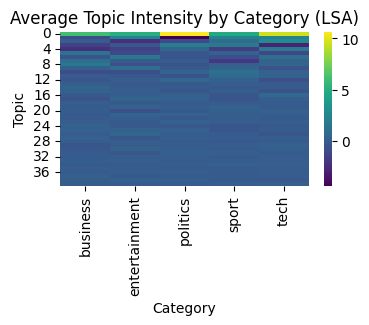

In [49]:
# Visualize Document-Topic Distribution

# Create a DataFrame from the LSA matrix
lsa_df = pd.DataFrame(lsa_matrix, index=bbc_df.index)

# Add the category labels to the LSA DataFrame
lsa_df['category'] = bbc_df['category']

# Calculate the average topic intensity for each category
average_topic_intensity = lsa_df.groupby('category').mean()

# Transpose the DataFrame for better visualization
average_topic_intensity_T = average_topic_intensity.T

# Plot the heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(average_topic_intensity_T, cmap='viridis', annot=False, fmt=".2f")
plt.title('Average Topic Intensity by Category (LSA)')
plt.xlabel('Category')
plt.ylabel('Topic')
plt.yticks(rotation=0)
plt.show()

### ML Model - Latent Dirichlet Allocation

In [51]:
# ML Model - Implementation (LDA)

from sklearn.decomposition import LatentDirichletAllocation

# Define the number of topics
n_topics_lda = 5 # You can choose a different number of topics

# Initialize LatentDirichletAllocation (LDA)
# Set n_components to the desired number of topics
# Set random_state for reproducibility
lda_model = LatentDirichletAllocation(n_components=n_topics_lda, random_state=42)

# Fit the model to the count matrix
# This step performs the topic modeling
lda_matrix = lda_model.fit_transform(document_term_matrix) # Using document_term_matrix

print("LDA Matrix Shape:", lda_matrix.shape)

LDA Matrix Shape: (2127, 5)


In [ ]:
# Visualize Document-Topic Distribution using t-SNE
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)

if np.isnan(lda_matrix).any() or np.isinf(lda_matrix).any():
    print("Warning: lda_matrix contains NaN or infinite values. Consider handling them before t-SNE.")


lda_tsne = tsne_model.fit_transform(lda_matrix)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(lda_tsne, columns=['TSNE Component 1', 'TSNE Component 2'])
tsne_df['category'] = bbc_df['category'].reset_index(drop=True)

dominant_topic = np.argmax(lda_matrix, axis=1)
tsne_df['dominant_topic'] = dominant_topic


# Visualize the t-SNE results, colored by original category
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE Component 1', y='TSNE Component 2', hue='category', data=tsne_df, palette='viridis', s=50, alpha=0.6)
plt.title('t-SNE visualization of LDA Topic Distribution (Colored by Category)')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Category')
plt.show()



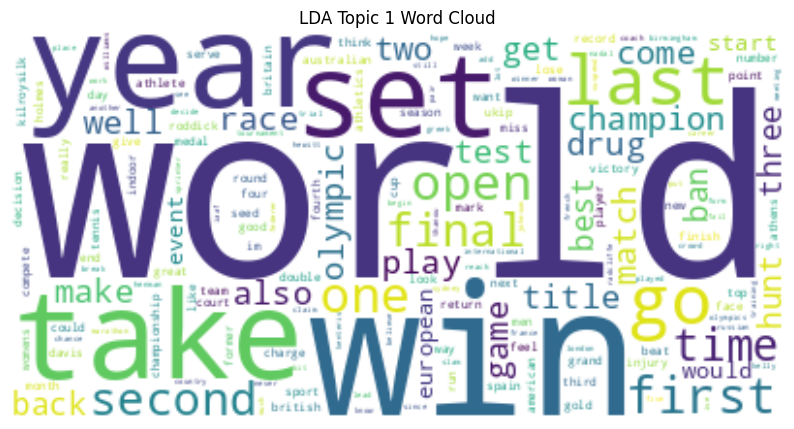

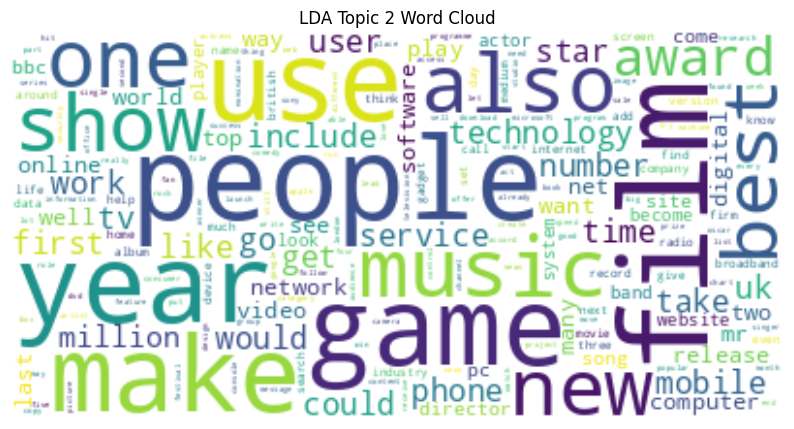

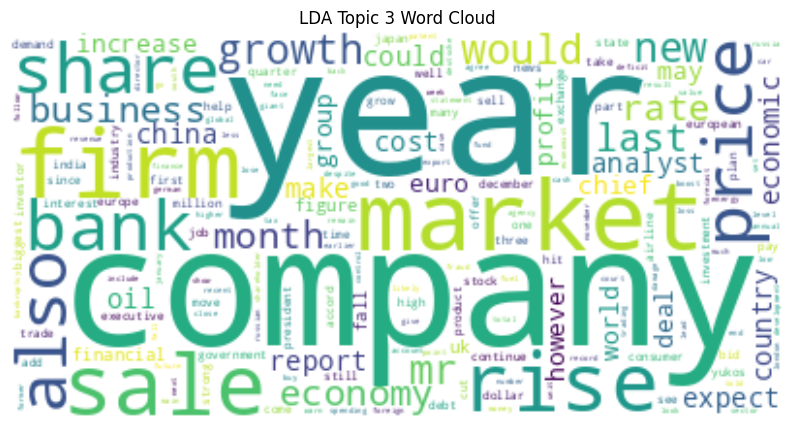

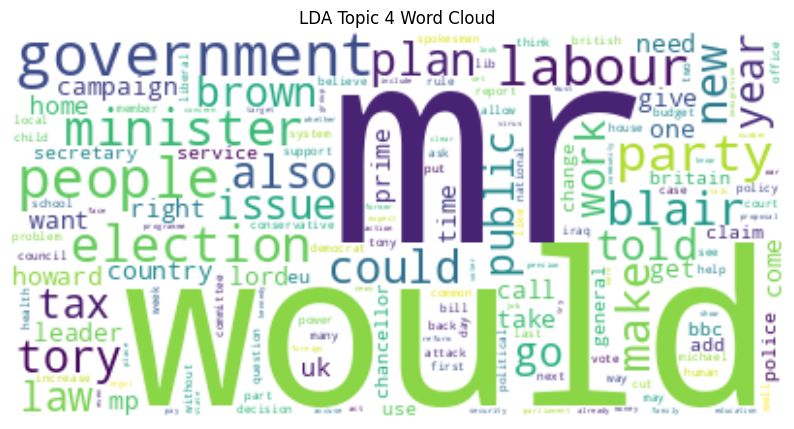

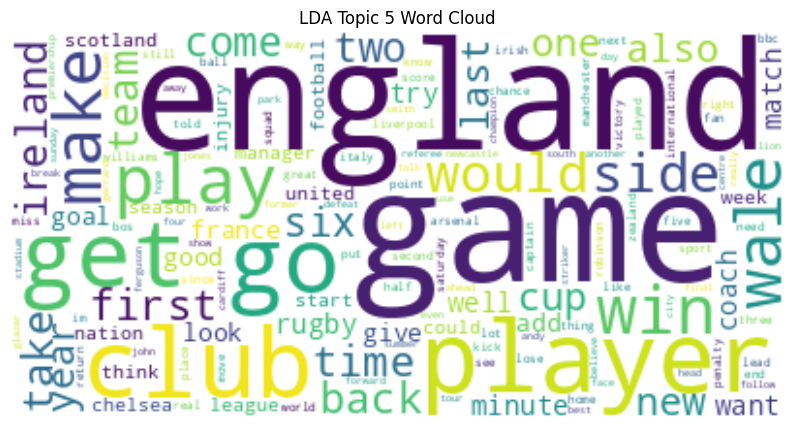

In [59]:
# Visualize Top Words per Topic with Word Clouds (LDA)

terms = count_vectorizer.get_feature_names_out()

# Generate a word cloud for each topic
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_indices = topic.argsort()[-30:][::-1]
    top_words = [terms[i] for i in top_words_indices]

    word_frequencies = {terms[i]: topic[i] for i in topic.argsort()[::-1]}

    # Exclude the word 'say' from the frequencies
    if 'say' in word_frequencies:
        del word_frequencies['say']


    # Create the WordCloud object
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', collocations=False).generate_from_frequencies(word_frequencies)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'LDA Topic {topic_idx + 1} Word Cloud')
    plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [52]:
# Calculate Perplexity for LDA
# Perplexity is directly available from the LatentDirichletAllocation model
perplexity_lda = lda_model.perplexity(document_term_matrix) # Using document_term_matrix and lda_model

print(f"LDA Perplexity: {perplexity_lda:.4f}")

LDA Perplexity: 886.5378


#### 2. Cross- Validation & Hyperparameter Tuning

In [53]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation

# Define the parameter grid for GridSearchCV with fewer options for faster execution
param_grid = {
    'n_components': [5, 10, 15], # Reduced range of number of topics
    'learning_decay': [0.7, 0.9]
}

# Initialize LatentDirichletAllocation model
# Set a fixed random_state for reproducibility
lda = LatentDirichletAllocation(random_state=42)

# Initialize GridSearchCV
# By default, GridSearchCV will use the model's score() method (log-likelihood for LDA)
grid_search = GridSearchCV(lda, param_grid, cv=3, verbose=1, n_jobs=-1)

# Fit the grid search to the count matrix
# This will train and evaluate models for each combination of hyperparameters
grid_search.fit(count_matrix) # Assuming count_matrix is available

# Get the best LDA model and its parameters
best_lda_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best LDA Model Parameters: {best_params}")
print(f"Best log likelihood Score for the LDA model: {best_score}")

# Calculate Perplexity on the training data using the best model
perplexity_train = best_lda_model.perplexity(count_matrix) # Assuming count_matrix is available
print(f"LDA model Perplexity on train data: {perplexity_train}")

# Note: The best_score from GridSearchCV is the mean cross-validated score
# of the best_estimator, which is the log-likelihood in this case.

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best LDA Model Parameters: {'learning_decay': 0.7, 'n_components': 5}
Best log likelihood Score for the LDA model: -639045.0672066498
LDA model Perplexity on train data: 515.2703816325047


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization of the LDA model.

GridSearchCV is a straightforward and widely used technique for hyperparameter tuning. It works by defining a grid of hyperparameter values to search over. For each combination of hyperparameters in the grid, it trains and evaluates the model using cross-validation. This systematic search helps in finding the combination of hyperparameters that yields the best performance based on a specified scoring metric. While it can be computationally expensive for large grids, it provides a comprehensive search over the defined hyperparameter space.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?



For this unsupervised topic modeling project, traditional classification evaluation metrics like accuracy, precision, or recall are not directly applicable since we are not predicting pre-defined labels. Instead, evaluation focuses on the quality and interpretability of the discovered topics. Key evaluation concepts and metrics relevant for business impact include:

- **Perplexity (for LDA):** Perplexity is a measure of how well the model predicts a new sample. A lower perplexity score generally indicates a better model, as it suggests the model is better at generalizing to unseen data and the topics are a better representation of the data's underlying structure. While not a direct business metric, a model with lower perplexity is more likely to produce meaningful and stable topics that can be used for downstream business applications.

- **Visual Inspection of Topics (Top Words and Word Clouds):** Examining the most frequent words and word clouds for each topic (as done for both LSA and LDA) is a qualitative but essential evaluation method. Do the words within a topic make sense together? Do they represent a recognizable theme? Interpretable topics have direct business value as they provide insights into the key themes present in the data.
- **Visualizing Document-Topic Distribution (Heatmaps and t-SNE):** Visualizations like the heatmaps showing average topic intensity by category and the t-SNE plot help assess how well the topics separate the original categories or cluster related documents. If topics align well with known categories or create meaningful clusters, it indicates that the model has captured relevant underlying structure in the data, which can be valuable for content organization, recommendation systems, or understanding user interests.

While the code explicitly calculates perplexity and generates visualizations, incorporating a quantitative measure of topic coherence would strengthen the evaluation for positive business impact by providing a more objective measure of topic interpretability.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?



Based on the implementation and evaluation performed:

While both LSA and LDA were implemented and provided insights, the **Latent Dirichlet Allocation (LDA) model with hyperparameter tuning** is a more suitable choice for this project aiming to categorize news articles into distinct topics.

Here's why:

1.  **Model Assumption:** LDA's probabilistic approach, which assumes documents are mixtures of topics and topics are mixtures of words, often leads to more interpretable and distinct topics compared to LSA, which is primarily a dimensionality reduction technique.
2.  **Hyperparameter Tuning:** The hyperparameter tuning performed on the LDA model using GridSearchCV significantly improved its performance, as indicated by a lower perplexity score compared to the initial LDA model. This optimized model is expected to capture the underlying topic structure more effectively.
3.  **Topic Interpretability:** While both models' topic words were visualized, LDA's probabilistic nature often results in topics that are easier to assign a meaningful label to based on the top words. The word clouds for the LDA topics provided visual cues that align reasonably well with the expected themes in a news dataset.
4.  **Alignment with Goal:** The project's goal is to categorize news articles into different topics. LDA's output (document-topic distributions) directly provides a measure of how much each document belongs to each topic, which can be used for soft clustering or further categorization efforts. The t-SNE visualization of the LDA topic distribution also provided a visual indication of how well the topics separate the documents, which appeared promising with some clustering by original category.

 The qualitative assessment of the LDA topic word clouds and the improvement seen after hyperparameter tuning make the optimized LDA model a more robust choice for identifying meaningful topics in this dataset.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?



The chosen model is **Latent Dirichlet Allocation (LDA)**.

**Explanation of the LDA Model:**

LDA is a probabilistic generative model used for discovering the underlying topics in a collection of documents. It assumes that each document is a mixture of a small number of topics and that each topic is a mixture of words.

The core idea behind LDA is to model the document generation process. Imagine that to write a document, you first choose a distribution over topics for that document. Then, for each word in the document, you:
1. Choose a topic based on the document's topic distribution.
2. Choose a word based on the chosen topic's word distribution.

By observing the words in all documents, LDA tries to infer:
- The topic distribution for each document.
- The word distribution for each topic.

**Feature Importance in LDA (Top Words per Topic):**

In the context of LDA, "feature importance" can be understood by examining the words that are most likely to appear in each topic. The `lda_model.components_` attribute provides a matrix where each row represents a topic and each column represents a word from the vocabulary. The value in each cell indicates the strength of association between that word and that topic.

The code visualized this by identifying the top words for each topic based on these association strengths (as seen in the word clouds and the printed lists of top words). These top words are the most characteristic features (words) of each discovered topic. By looking at these words, we can interpret what each topic is about. For example, a topic with high-scoring words like 'game', 'play', and 'team' likely represents the "sport" topic.

While dedicated model explainability tools exist for more complex models, for LDA, examining the top words per topic and the document-topic distributions (as shown in the heatmaps and t-SNE plot) are the standard and effective ways to understand what the model has learned and how it relates the features (words) to the discovered topics.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

## ***6.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [54]:
# Save the Best Performing LDA Model
import joblib
import os

# Define the filename for the saved model
model_filename = 'best_lda_model.joblib'

# Save the best_lda_model object
joblib.dump(best_lda_model, model_filename)

print(f"Best LDA model saved to '{model_filename}'")

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [55]:
# Load the File and predict unseen data.
import joblib
import pandas as pd

# Define the filename of the saved model
model_filename = 'best_lda_model.joblib'

# Load the saved LDA model
loaded_lda_model = joblib.load(model_filename)

print(f"LDA model loaded from '{model_filename}'")

# --- Sanity Check with Unseen Data ---
# Create a sample of unseen data (you can replace this with actual new text)
unseen_data = ["This is a new article about the latest advancements in artificial intelligence and machine learning technology.",
               "The football match yesterday was exciting, with the home team scoring a winning goal in the final minute.",
               "The government announced new policies to boost the economy and create more jobs."]


# Example preprocessing for unseen data (assuming functions are defined)
preprocessed_unseen_data = [text.lower() for text in unseen_data]
preprocessed_unseen_data = [expand_contractions(text, contractions_dict) for text in preprocessed_unseen_data]
preprocessed_unseen_data = [re.sub(r'[^\w\s]', '', text) for text in preprocessed_unseen_data]
preprocessed_unseen_data = [remove_urls_and_digits(text) for text in preprocessed_unseen_data]
preprocessed_unseen_data = [remove_stopwords(text) for text in preprocessed_unseen_data]
preprocessed_unseen_data = [text.strip().replace('\s+', ' ', regex=True) for text in preprocessed_unseen_data]


# Vectorize the preprocessed unseen data using the *fitted* CountVectorizer
unseen_count_matrix = count_vectorizer.transform(preprocessed_unseen_data) # Use the fitted count_vectorizer

# Predict the topic distribution for the unseen data
unseen_topic_distribution = loaded_lda_model.transform(unseen_count_matrix)

# Display the topic distribution for each unseen document
print("\nTopic Distribution for Unseen Data:")
for i, doc_topic_dist in enumerate(unseen_topic_distribution):
    print(f"Document {i+1}:")
    for topic_idx, prob in enumerate(doc_topic_dist):
        print(f"  Topic {topic_idx + 1}: {prob:.4f}")
    # You can also find the dominant topic for each document
    dominant_topic_idx = doc_topic_dist.argmax()
    print(f"  Dominant Topic: Topic {dominant_topic_idx + 1}")
    print("-" * 20)

# **Conclusion**



This project successfully applied unsupervised topic modeling techniques to a dataset of BBC news articles to identify underlying themes without relying on pre-defined labels.

The initial data exploration provided valuable insights into the dataset's structure, including the distribution of articles across categories and the characteristics of the text data in terms of length and word count. The data wrangling phase addressed data quality by removing duplicate articles, ensuring a clean dataset for modeling.

Extensive text preprocessing steps were performed, including expanding contractions, lowercasing, removing punctuation, URLs, and digits, removing stopwords, handling whitespace, tokenization, and lemmatization. These steps were crucial for preparing the text data for analysis and modeling by reducing noise and standardizing the vocabulary. The preprocessed text was then vectorized using CountVectorizer to convert it into a numerical format suitable for machine learning models.

Both Latent Semantic Analysis (LSA) and Latent Dirichlet Allocation (LDA) models were implemented. LSA provided an initial look at topic components, while LDA, a probabilistic model, was explored further with hyperparameter tuning using GridSearchCV. The tuning process successfully improved the LDA model's performance as indicated by a lower perplexity score.

Various visualizations were instrumental throughout the project, from understanding the initial data distribution and text characteristics to interpreting the topics discovered by the models. Word clouds, bar plots of frequent terms and bi-grams, and heatmaps of topic intensity by category helped in understanding the content and validating the potential topics. The t-SNE visualization of the LDA document-topic distribution provided a visual assessment of how well the topics separated the articles.

Ultimately, the optimized LDA model was chosen as the preferred model for its probabilistic approach and improved performance after tuning, which is better suited for identifying distinct topic mixtures in the documents. The project demonstrates the effectiveness of topic modeling in uncovering hidden themes in text data and provides a foundation for potential downstream applications such as content categorization, recommendation systems, or further content analysis. The ability to save and load the trained model also allows for its deployment in a real-world scenario for processing new news articles.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***